# **Project Name**    - Transport Demand Prediction

## **Project Overview**

The project aims to develop a predictive model for Mobiticket, forecasting the number of seats sold for each ride on specific routes, dates, and times. The routes span 14 towns towards Lake Victoria, culminating in Nairobi. The journey involves 8 to 9 hours to reach the outskirts of Nairobi and an additional 2 to 3 hours to reach the main bus terminal. Traffic conditions significantly influence passenger experiences during travel into the city and towards their final destinations in Nairobi. Analyzing these patterns enables service planning improvements and operational optimization for Mobiticket.

To enhance model performance, additional features have been generated, offering more relevant information to contribute to improved predictions. The dataset has undergone testing using multiple regression models, providing insights for a comprehensive evaluation of predictive capabilities. The model highlights and displays the most significant features identified, crucial in determining seat sales. By showcasing these influential factors, stakeholders gain a deeper understanding of elements driving seat sales.

# **Problem Statement**

## **Problem Description**

This challenge requires building a model predicting the number of seats Mobiticket can expect to sell for each ride—specific routes, dates, and times across 14 towns towards Lake Victoria, ending in Nairobi.

### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

The routes take approximately 8 to 9 hours from departure to reach the outskirts of Nairobi and an additional 2 to 3 hours to the main bus terminal in the Central Business District.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Understanding:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Capstone Projects/Transport Demand Prediction/Nairobi Transport Data/'
df = pd.read_csv(path + 'train_revised.csv')

In [ ]:
# dataset first 5 rows
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


**Table**

* `ride_id`: unique ID of a vehicle on a specific route on a specific day and time.
* `seat_number`: seat assigned to ticket
* `payment_method`: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* `payment_receipt`: unique id number for ticket purchased from Mobiticket
* `travel_date`: date of ride departure. (MM/DD/YYYY)
* `travel_time`: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* `travel_from`: town from which ride originated
* `travel_to`: destination of ride. All rides are to Nairobi.
* `car_type`: vehicle type (shuttle or bus)
* `max_capacity`: number of seats on the vehicle

In [ ]:
# Dataset Rows & Columns count
df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 51645 rows and 10 columns


In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
#checking the Null/Missing value in dataset
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

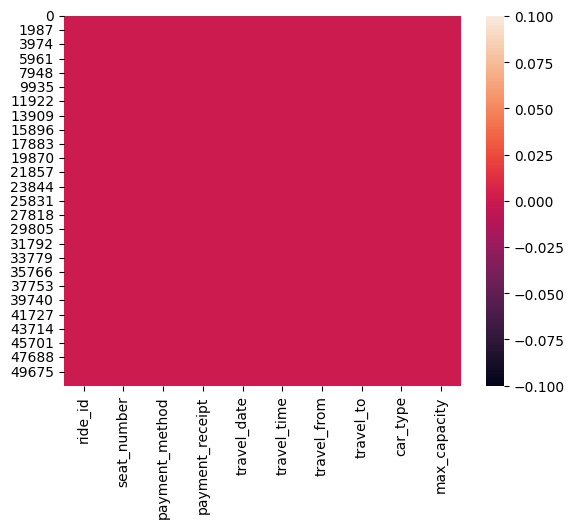

In [ ]:
# To see missing values with heatmap:
sns.heatmap(df.isnull());

In [ ]:
# checking duplicate value in the dataset
df.duplicated().sum()

0

### What did you know about your dataset?
In the above data:
1. There are no duplicate rows
2. There are no null values

In [ ]:
# Dataset Columns
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [ ]:
df['payment_method'].unique()

array(['Mpesa', 'Cash'], dtype=object)

### **Summary:-**

* There are total **61** unique  seats in this dataset

* travelers have used 2 types of payment method and most of the people have used **Mpesa** to pay for their ticket.

* The record of 149 days out of 2 year is present in this dataset.


* There are 2 different types of car and most of them are bus.

## Issues with the Dataset
Table
1. **Dirty Data**

*   Incorrect data type assigned to travel_date, travel_time . `validity`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


## ***Data Wrangling***

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


There is no specified target variable in the data.

According to business problem, it requires us to predict the number of tickets we can sell on a particular route and particular date and time. Hence, a new column is created for number of tickets by grouping the data on ride_id

In [ ]:
#Checking number of unique ride ids
len(df['ride_id'].unique())

6249

We see there are 6249 unique ride_id.

In [ ]:
# Making target variable 'number of ticket' by grouping the dataframe on ride_id column
label=df.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


*  Now we found our target variable so let us delete the duplicate values from `ride_id`

In [ ]:
# Dropping duplicates
df.drop_duplicates('ride_id',inplace=True)
df.shape

(6249, 10)

* Now let us merge two datasets on `ride_id` key to make the final dataset where we have dependent as well as independent variables too.

In [ ]:
# Merging this new dataframe with orginal dataframe on column ride_id
df = df.merge(label, how='left', on='ride_id')
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


* Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model

In [ ]:
# Dropping constant column travel_to and other unuseful columns
df.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1, inplace=True)
df.shape

(6249, 7)

In [ ]:
# Creating a column date which is a combination of columns travel_date and travel_time
df['date'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'])
df['travel_date'] = pd.to_datetime(df['travel_date'])

In [ ]:
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00
4,5778,2017-11-27,7:12,Migori,Bus,49,31,2017-11-27 07:12:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ride_id           6249 non-null   int64         
 1   travel_date       6249 non-null   datetime64[ns]
 2   travel_time       6249 non-null   object        
 3   travel_from       6249 non-null   object        
 4   car_type          6249 non-null   object        
 5   max_capacity      6249 non-null   int64         
 6   number_of_ticket  6249 non-null   int64         
 7   date              6249 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 439.4+ KB


In [ ]:
def  time_features(df):
    '''This function takes dataframe as an argument and extracts the different features
    from the date variable of the dataset and finaly returns the updated dataset'''

    df["day_of_week"] = df["date"].dt.dayofweek
    df["day_of_year"] = df["date"].dt.dayofyear
    df["day_of_month"] = df["date"].dt.day
    df["year_woy"] = df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
    df["hour"] = df["date"].dt.hour
    df["minute"] = df["date"].dt.minute
    df["is_weekend"] = df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
    df["year"] = df["date"].dt.year
    df["quarter"] = df["date"].dt.quarter
    df["month"] = df["date"].dt.month
    return df

In [ ]:
# Applying function on our dataframe
df_new = time_features(df)

In [ ]:
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,2017-11-27,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [ ]:
# Converting travel_time column into integer format
df_new['travel_time'] = df_new['travel_time'].str.split(':').apply(lambda x: round(int(x[0]) + int(x[1])/60 ,2) )

In [ ]:
# Creating function that defines periods for time intervals
def get_period(hour):
    """
    Assigns a period label based on the hour of the day.
    """
    if hour < 7:
        return 'Early Morning'
    elif hour >= 7 and hour <11:
        return 'Morning'
    elif hour >= 11 and hour <15:
        return "Afternoon"
    elif hour >= 15 and hour <19:
        return 'Evening'
    elif hour >= 19 and hour <24:
        return 'Night'
df_new['period'] = df_new['hour'].apply(get_period)

In [ ]:
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period
0,1442,2017-10-17,7.25,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,Morning
1,5437,2017-11-19,7.20,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,Morning
2,5710,2017-11-26,7.08,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,Morning
3,5777,2017-11-27,7.17,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,Morning
4,5778,2017-11-27,7.20,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,Morning


### What all manipulations have you done and insights you found?

1. Created target variable 'number_of_ticket'
2. Dropped constant and non essential columns
3. Used travel_date and travel_time columns to extract and create datetime related features
4. Created period feature from travel time for data visualization

## ***EDA***

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ride_id           6249 non-null   int64         
 1   travel_date       6249 non-null   datetime64[ns]
 2   travel_time       6249 non-null   float64       
 3   travel_from       6249 non-null   object        
 4   car_type          6249 non-null   object        
 5   max_capacity      6249 non-null   int64         
 6   number_of_ticket  6249 non-null   int64         
 7   date              6249 non-null   datetime64[ns]
 8   day_of_week       6249 non-null   int64         
 9   day_of_year       6249 non-null   int64         
 10  day_of_month      6249 non-null   int64         
 11  year_woy          6249 non-null   object        
 12  hour              6249 non-null   int64         
 13  minute            6249 non-null   int64         
 14  is_weekend        6249 n

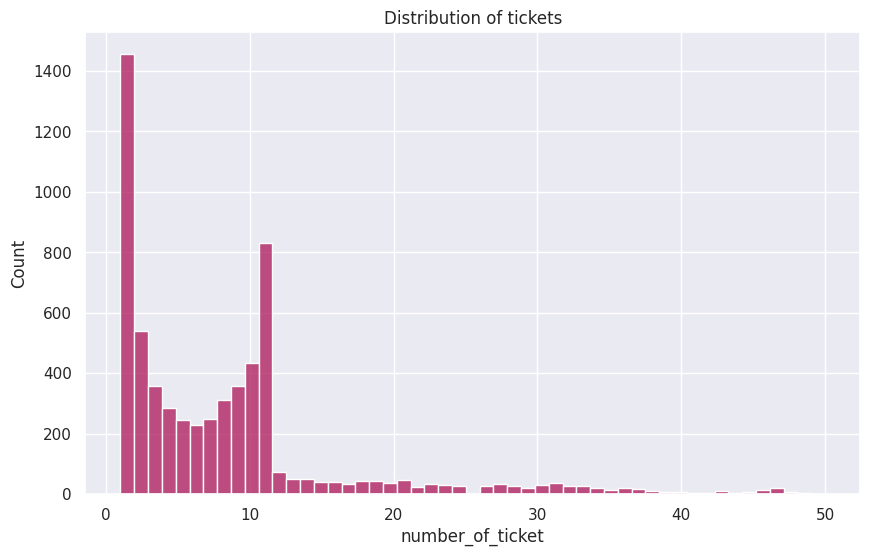

In [ ]:
# Histogram for distribution of tickets

plt.figure(figsize=(10,6))
sns.histplot(df['number_of_ticket'],color='#ad1759')
plt.title('Distribution of tickets');

* From data, usually number of tickets bought per ride_id is between 1 and 12

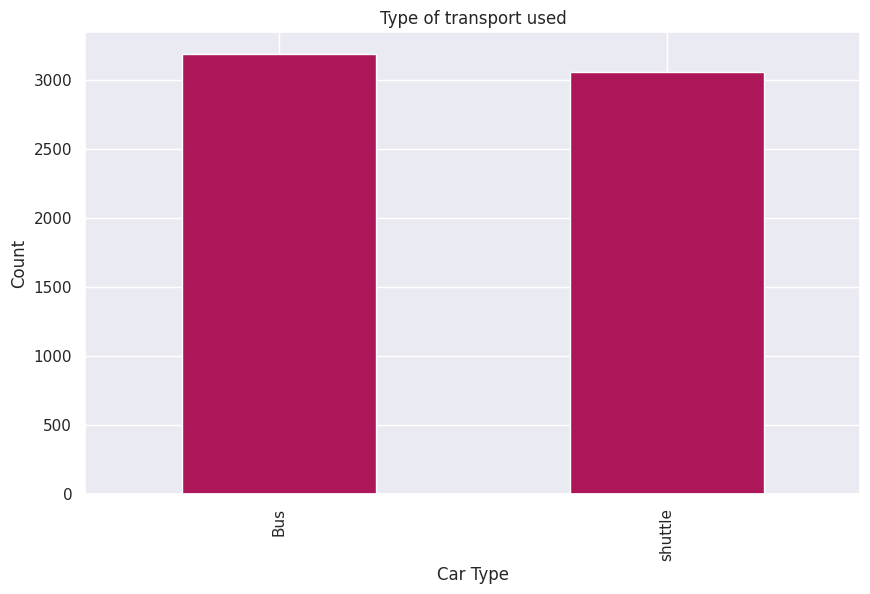

In [ ]:
# Bar chart for types of transport used

plt.figure(figsize=(10,6))
df_new['car_type'].value_counts().plot(kind='bar',color='#ad1759')
plt.title('Type of transport used')
plt.xlabel('Car Type')
plt.ylabel('Count');

* The number of Buses and shuttle are nearly equal in the data. Hence, both type of cars are used equally for travelling

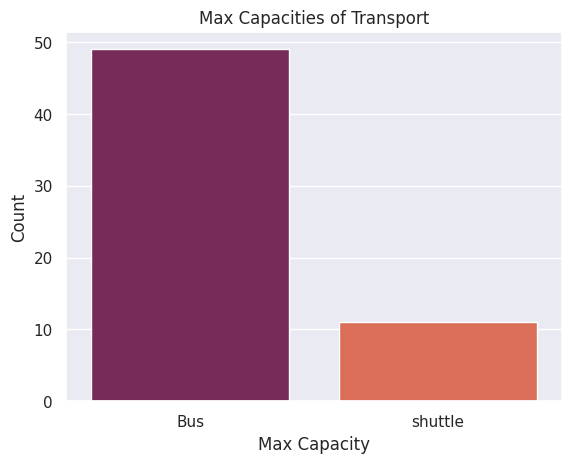

In [ ]:
# Bar chart for Max Capacities of transport

sns.barplot(data = df_new, x = 'car_type', y= 'max_capacity',palette='rocket')
plt.title('Max Capacities of Transport')
plt.xlabel('Max Capacity')
plt.ylabel('Count');

* Buses have max capacity of bus is 49, whereas max capacity of shuttle is 11.

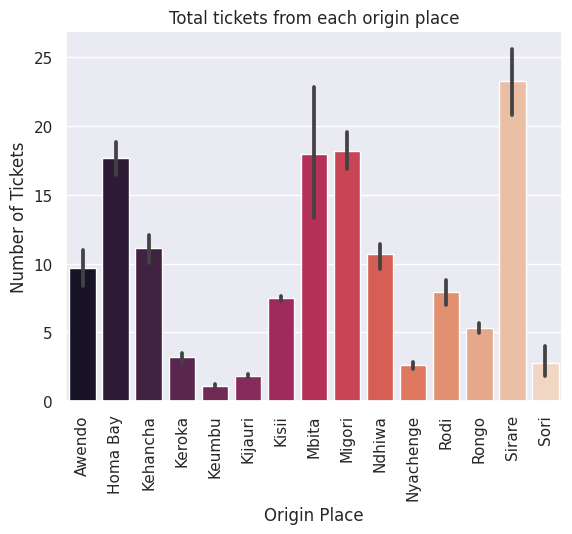

In [ ]:
# Bar chart for total number of ticket from each origin place
sns.barplot(data=df_new,x='travel_from',y='number_of_ticket',palette='rocket')
plt.xticks(rotation = 90)
plt.title('Total tickets from each origin place')
plt.xlabel('Origin Place')
plt.ylabel('Number of Tickets');

Most number of tickets are sold from:
1. Sirare
2. Mbita
3. Migori

While the least number of tickets are sold from:
1. Keumbu
2. Kendu Bay

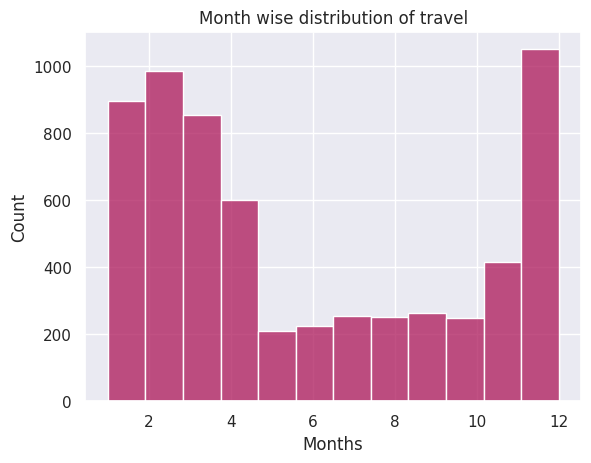

In [ ]:
# Monthwise Distribution of travellers

sns.histplot(df_new['month'],bins=12, color='#ad1759')
plt.title('Month wise distribution of travel')
plt.xlabel('Months')
plt.ylabel('Count');

* Most of the traveling is done in the months of January, February and December.

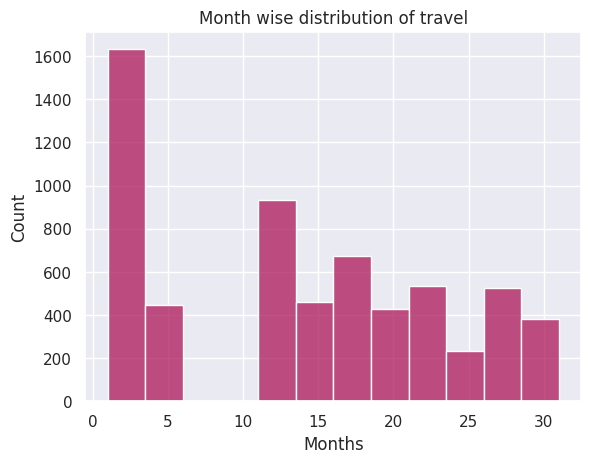

In [ ]:
# Day of Monthwise Distribution of travellers

sns.histplot(df_new['day_of_month'],bins=12, color='#ad1759')
plt.title('Month wise distribution of travel')
plt.xlabel('Months')
plt.ylabel('Count');

* Most of the traveling is done from before 5th of the month, there seems to be no traveling done between 5th and 11th of the month. This can be because of transport holiday during this period every month.

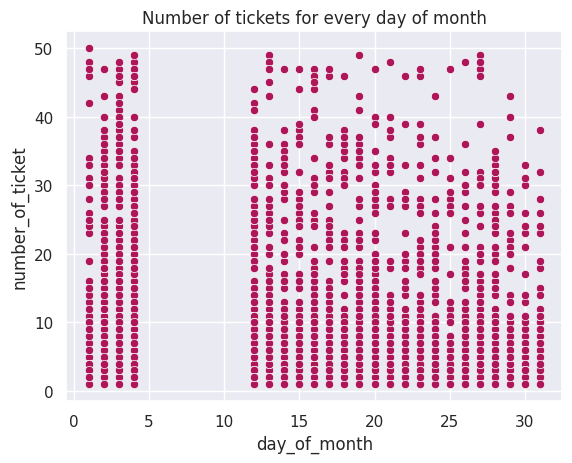

In [ ]:
# Scatterplot of number of tickets sold for everyday of the month

sns.scatterplot(data = df_new, x = 'day_of_month',y = 'number_of_ticket',color='#ad1759')
plt.title('Number of tickets for every day of month');

* Similar to above graph, we can see there are no tickets sold between 5th and 11th of every month. Transport may be closed during this period every month because of tranport holiday.

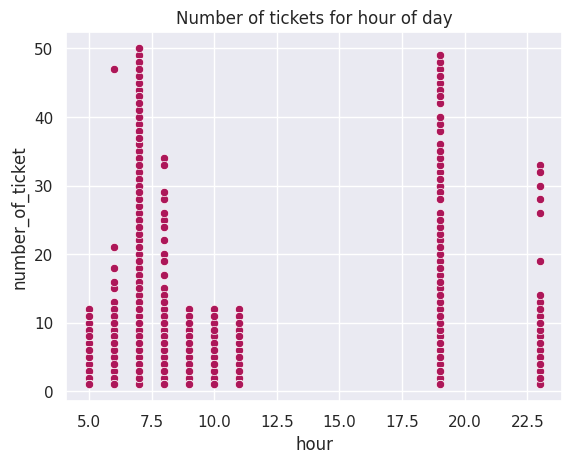

In [ ]:
# Scatterplot for number of tickets in every hour of day.

sns.scatterplot(data = df_new, x = 'hour',y = 'number_of_ticket',color='#ad1759')
plt.title('Number of tickets for hour of day');

* In the day, most tickets are sold at 7AM and close to 7PM. This can be because people going to and returning from work in Nairobi at these times. Similarly, there are no tickets sold between 12PM and 5:30 PM.

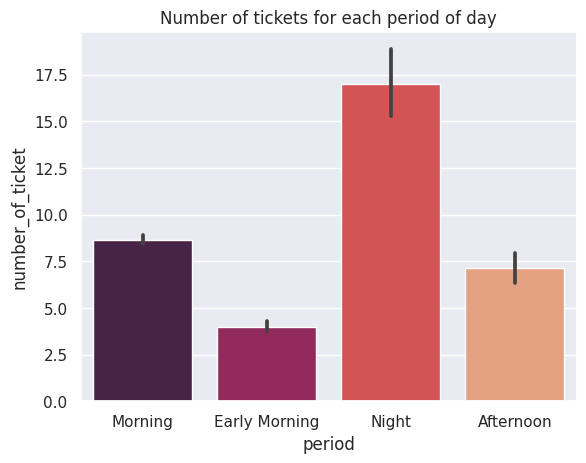

In [ ]:
# Bar chart for Number of tickets for each period of day

sns.barplot(data = df_new, x = 'period', y = 'number_of_ticket', palette= 'rocket')
plt.title('Number of tickets for each period of day');

* Most number of tickets are sold in evening or night followed by morning hours.

## ***Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Most number of tickets are sold in morning.
2. The number of buses used in traveling is same as the number of shuttle used
3. There is no traveling done in afternoon.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Most number of tickets are sold in morning.

Null Hypothesis : Most number of tickets are sold in morning

Alternative Hypothesis : Most number of tickets are not sold in morning

#### 2. Perform an appropriate statistical test.

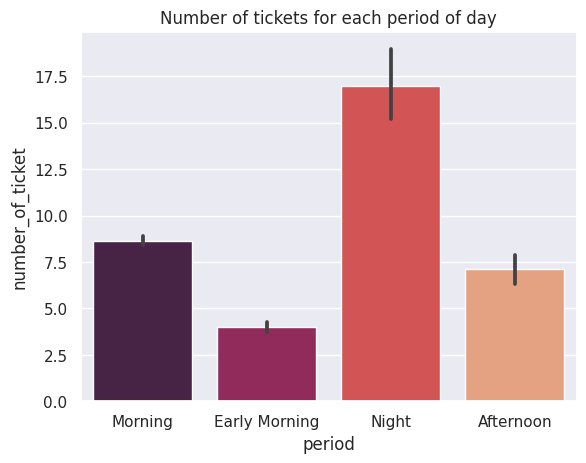

In [ ]:
sns.barplot(data=df_new, x='period',y='number_of_ticket', palette='rocket')
plt.title('Number of tickets for each period of day');

* From above we can see, max tickets are sold in evening or night, hence we can reject null hypothesis

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: The number of buses used in traveling is same as the number of shuttle used. Let Number of buses used be Nb, and Number of shuttle used be Ns

Null Hypothesis (H0) : Nb = Ns

Arlternative Hypothesis (Ha) : Nb != Ns

#### 2. Perform an appropriate statistical test.

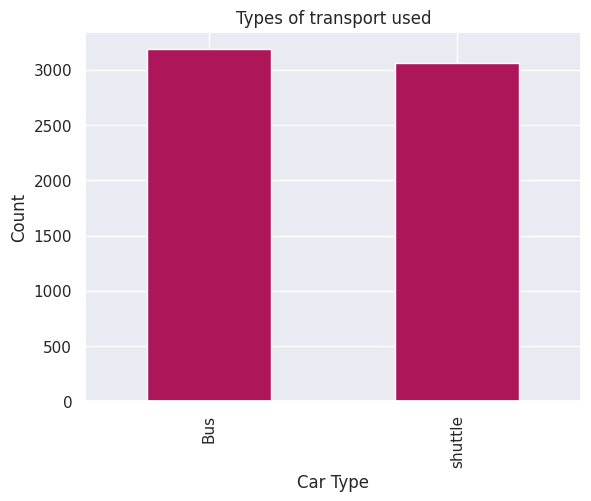

In [ ]:
df_new['car_type'].value_counts().plot(kind='bar',color='#ad1759')
plt.title("Types of transport used")
plt.xlabel('Car Type')
plt.ylabel('Count');

From above, Nb > Ns, hence we can reject Null Hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is no traveling done in afternoon. Let number of travellers at afternoon period (12pm - 4pm) be Na.

Null Hypothesis (H0) : Na = 0  (No travellers in afternoon)

Alternative Hypothesis (Ha) : Na != 0

#### 2. Perform an appropriate statistical test.

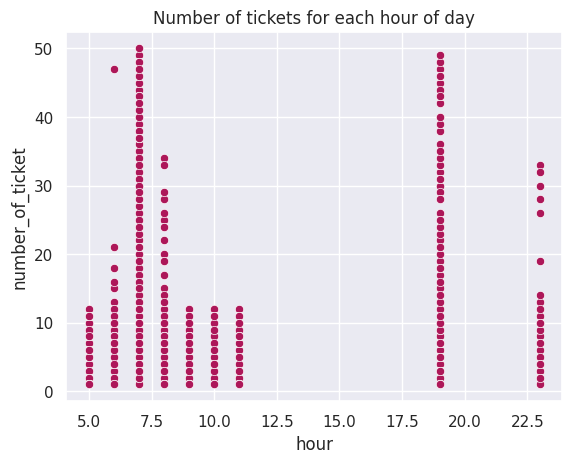

In [ ]:
sns.scatterplot(data=df_new, x='hour',y='number_of_ticket',color='#ad1759')
plt.title('Number of tickets for each hour of day');

From above we can see that between 12pm and 4pm (Afternoon), there are no travellers, or number of tickets sold are 0.

Hence Na = 0, therefore we cannot reject Null Hypothesis.

## ***Feature Engineering, Data Pre-processing & Transformation***

### 1. Feature Manipulation & Selection

In [ ]:
df_new.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [ ]:
df_new.day_of_year.value_counts()

285    94
348    89
193    81
224    81
163    80
       ..
359     5
290     1
323     1
330     1
318     1
Name: day_of_year, Length: 149, dtype: int64

In [ ]:
df_new.day_of_month.value_counts()

2     706
12    685
3     659
4     446
1     267
13    249
14    247
16    238
28    228
19    226
18    226
15    213
17    209
20    202
22    192
21    183
27    179
29    177
23    159
24    137
26    120
30    113
25     96
31     92
Name: day_of_month, dtype: int64

In [ ]:
df_new.period.value_counts()

Morning          4888
Early Morning     988
Night             286
Afternoon          87
Name: period, dtype: int64

From above 3 value counts, we can see:
1. Some months have higher frequency of travel
1. Some days in year have very high frequency of travelers, while others have really low frequency. This is because of more traveling being done in some month than others.
2. Some days in a month have high frequeny of travel than others.
3. Some period in the day have high frequency of travel.

To manage this, we will create a dictionary of the frequency for the 4 columns above and create 4 new columns taking log transform for the same.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
period_dict = dict(df_new.period.value_counts())
df_new['hour_wise_weights'] = np.log1p(df_new.period.map(period_dict))

# Creating a seperate column for giving day of a year wise weights for the hours column
day_of_year_dict = dict(df_new.day_of_year.value_counts())
df_new['day_of_year_wise_weights'] = np.log1p(df_new.day_of_year.map(day_of_year_dict))

# Giving weights to the each days of the month based on the frequency of ticket bookings
day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
df_new['day_of_month_wise_weights'] = df_new.day_of_month.replace(day_of_month_wise_weights_dict)

# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
df_new['month_wise_weights'] = df_new.month.replace(month_wise_weights_dict)

In [ ]:
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,minute,is_weekend,year,quarter,month,period,hour_wise_weights,day_of_year_wise_weights,day_of_month_wise_weights,month_wise_weights
0,1442,2017-10-17,7.25,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,15,0,2017,4,10,Morning,8.494743,0.693147,3,3
1,5437,2017-11-19,7.20,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,12,1,2017,4,11,Morning,8.494743,0.693147,3,2
2,5710,2017-11-26,7.08,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,5,1,2017,4,11,Morning,8.494743,0.693147,4,2
3,5777,2017-11-27,7.17,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,10,0,2017,4,11,Morning,8.494743,3.871201,4,2
4,5778,2017-11-27,7.20,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,12,0,2017,4,11,Morning,8.494743,3.871201,4,2


In [ ]:
# Creating a method to create new features in df

# Creating columns for time difference between next and previous buses for each of the origin places (travel_from).
def find_difference_bw_bus(data):

    data.sort_values(["travel_from","date"],inplace=True,ascending=True)
    data["Time_gap_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
    data["Time_gap_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
    data["Time_gap_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
    data["Time_gap_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
    data["Time_gap_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
    data["Time_gap_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
    data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600

    cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]

     #Handling missing values
    data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
    data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")


    return data #(data-df_new.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600


In [ ]:
transport_data_new = find_difference_bw_bus(df_new)

In [ ]:
transport_data_new.groupby(["travel_from"]).date.shift(-1)

502    2018-01-04 07:08:00
5530   2018-01-04 07:12:00
5533   2018-01-04 07:13:00
5539   2018-01-04 08:00:00
5528   2018-01-13 07:08:00
               ...        
5833   2018-11-04 07:05:00
5875   2018-11-04 23:10:00
5834   2018-12-04 07:05:00
5921   2018-12-04 23:10:00
5884                   NaT
Name: date, Length: 6249, dtype: datetime64[ns]

In [ ]:
transport_data_new[['travel_from','date','Time_gap_btw_0_1_next_bus','Time_gap_btw_0_1_previous_bus']].head()

,travel_from,date,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus
502,Awendo,2017-05-12 07:08:00,-5688.000000,5688.000000
5530,Awendo,2018-01-04 07:08:00,-0.066667,5688.000000
5533,Awendo,2018-01-04 07:12:00,-0.016667,0.066667
5539,Awendo,2018-01-04 07:13:00,-0.783333,0.016667
5528,Awendo,2018-01-04 08:00:00,-215.133333,0.783333


In [ ]:
# Making a dictionary containing distances of originating places from nairobi, taken from google maps
distance_from_nairobi = {'Awendo':351, 'Homa Bay':360, 'Kehancha': 387.7, 'Keroka': 280, 'Keumbu':295, 'Kijauri':271,
                         'Kisii':305.1, 'Mbita':401, 'Migori': 370, 'Ndhiwa': 371, 'Nyachenge':326, 'Rodi':348, 'Rongo':332,
                         'Sirare':392, 'Sori':399}

transport_data_new['distance_to_destination'] = transport_data_new['travel_from'].map(distance_from_nairobi)

In [ ]:
transport_data_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'period', 'hour_wise_weights',
       'day_of_year_wise_weights', 'day_of_month_wise_weights',
       'month_wise_weights', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'distance_to_destination'],
      dtype='object')

In [ ]:
transport_data_new.dropna(inplace=True)

### ***Multicollinearity***

Text(0.5, 1.0, 'Public Transport dataset correlation table')

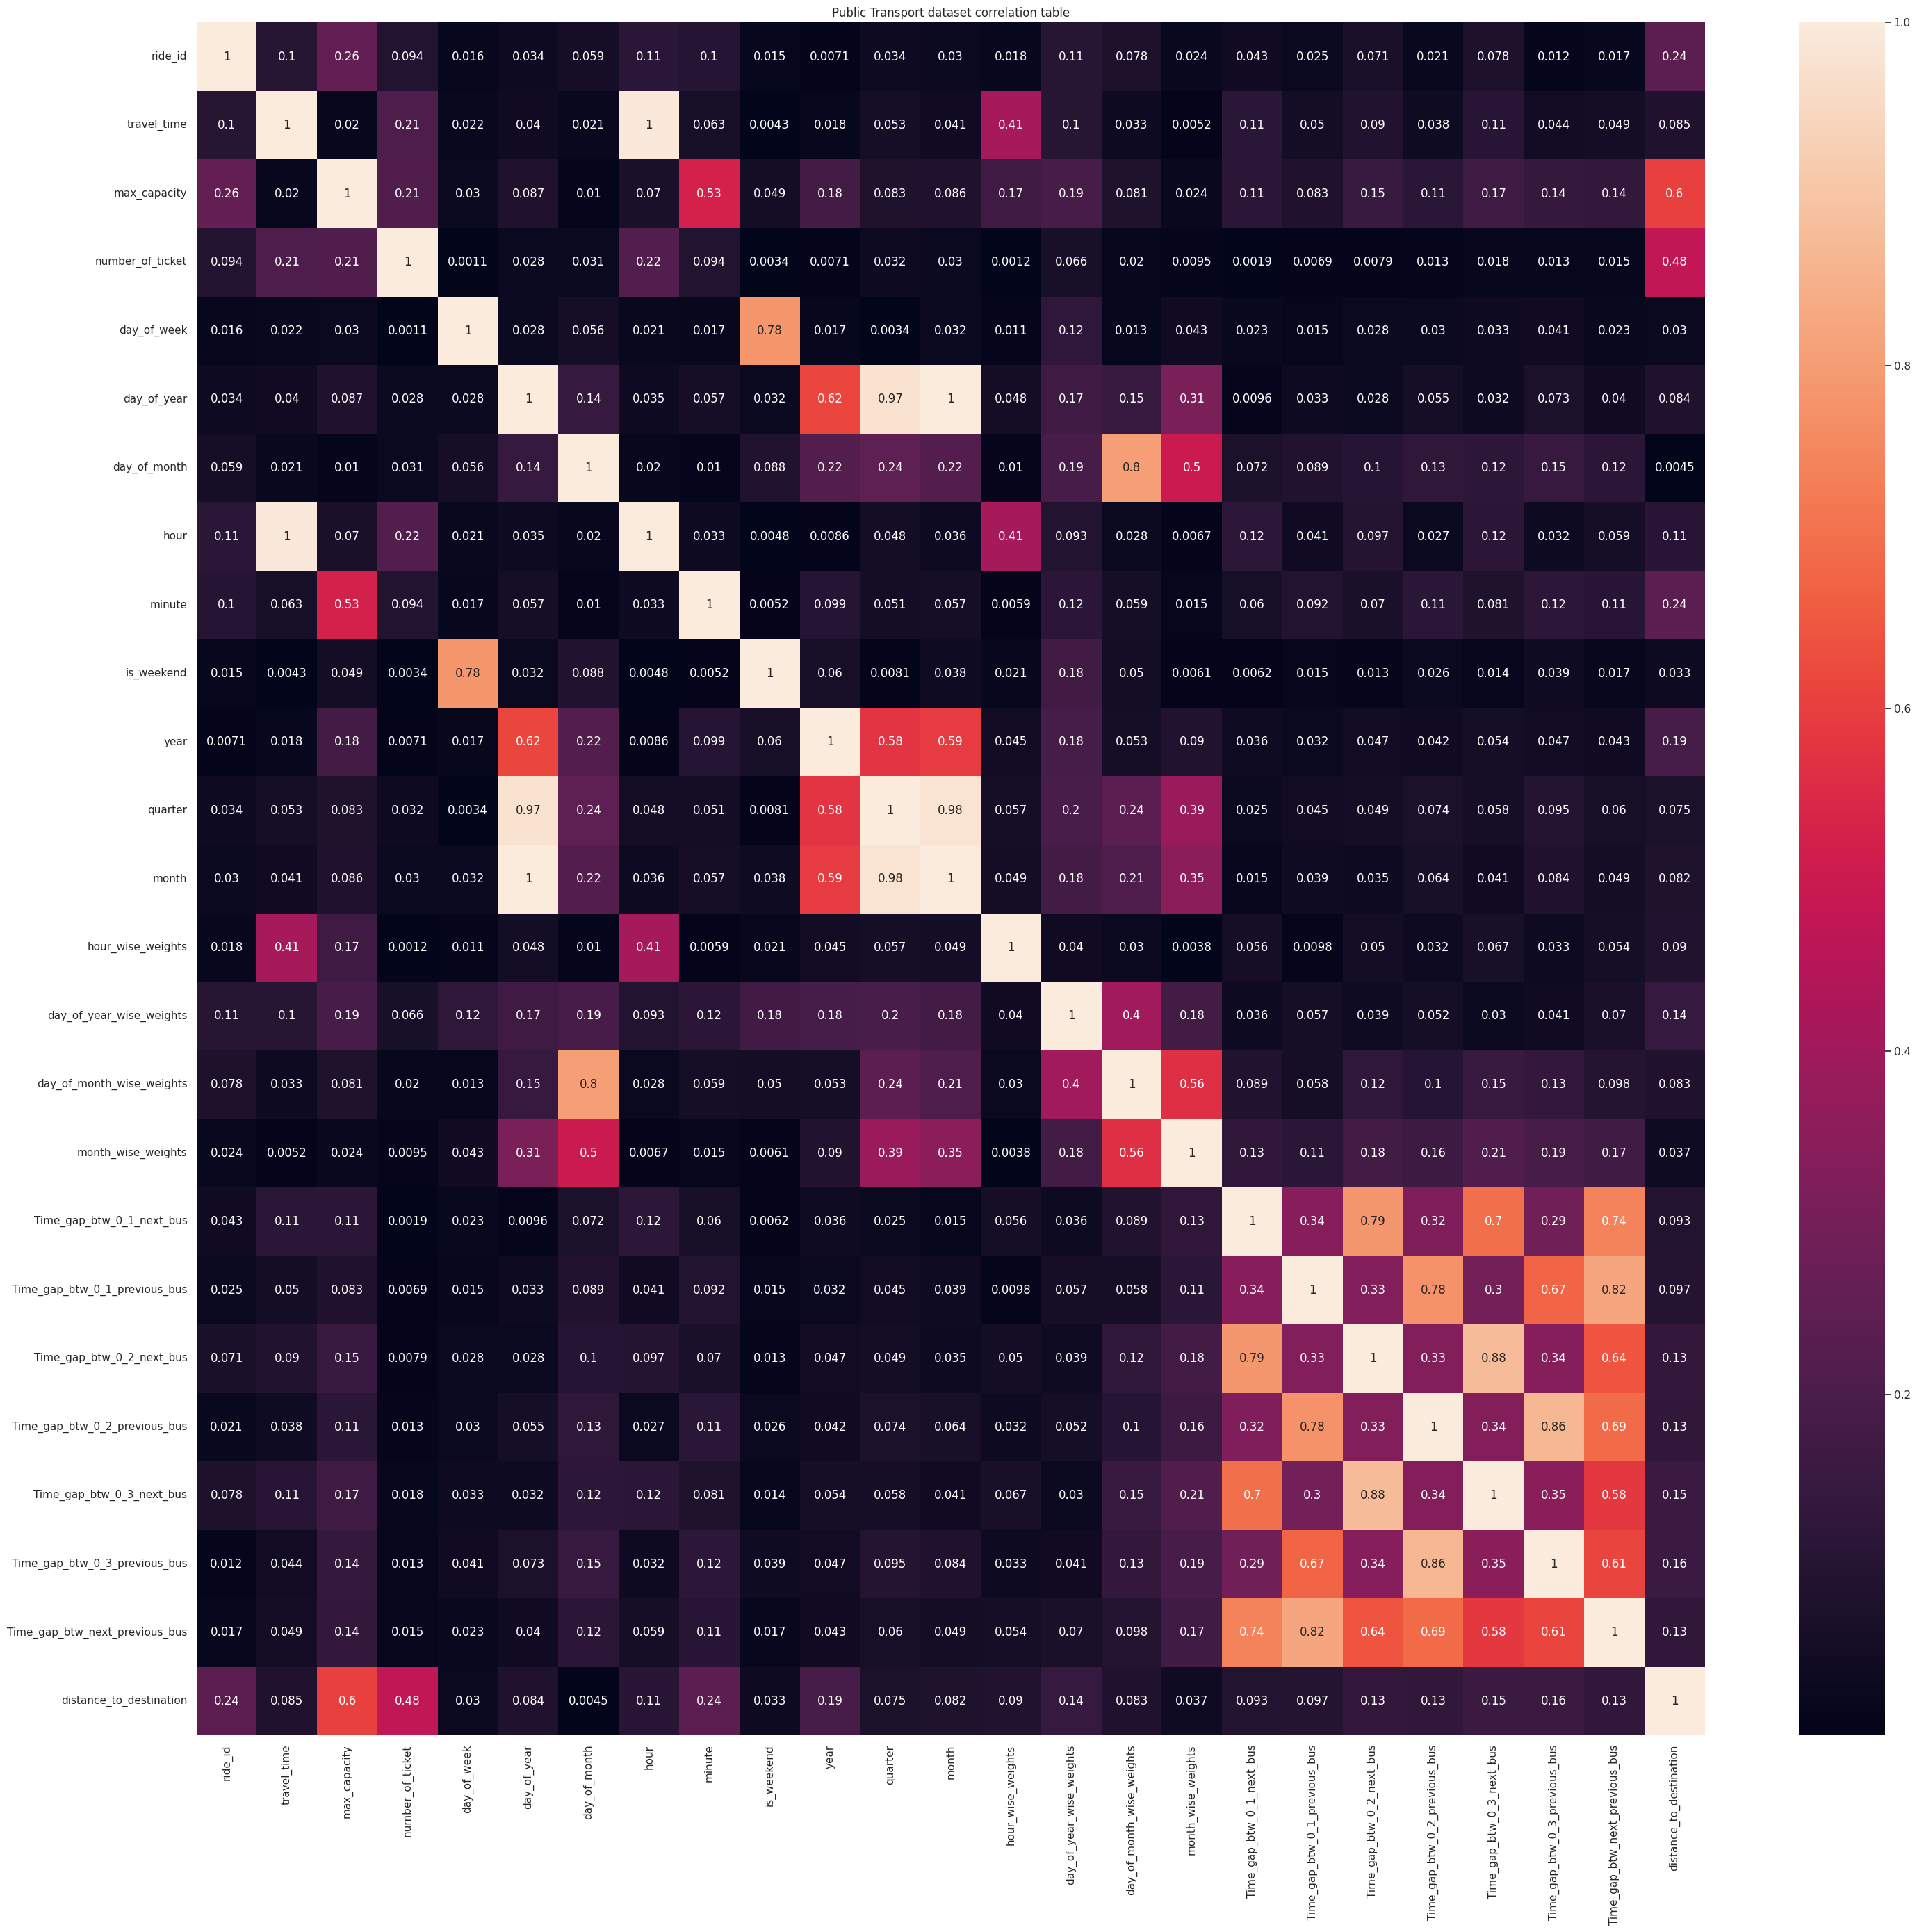

In [ ]:
transport_df_corr = transport_data_new.corr()
fig = plt.figure(figsize=(35,32))
ax = fig.gca()
sns.heatmap(abs(transport_df_corr), annot=True, cmap='rocket')
plt.title('Public Transport dataset correlation table');

* Many columns have high correlation with newly formed features. Hence columns like travel_month, travel_day_of_year, travel_day_of_month, etc. will be dropped because we have already created new weighted columns for these.

## ***Categorical Encoding + Data Splitting***

In [ ]:
# Encode your categorical columns

final_df = pd.get_dummies(df_new, columns=  ['travel_from','car_type','day_of_month_wise_weights','month_wise_weights'],drop_first=True)

In [ ]:
final_df.head()

,ride_id,travel_date,travel_time,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle,day_of_month_wise_weights_2,day_of_month_wise_weights_3,day_of_month_wise_weights_4,month_wise_weights_2,month_wise_weights_3
502,6654,2017-05-12,7.13,49,2,2017-05-12 07:08:00,4,132,12,201719,...,0,0,0,0,0,0,0,0,0,1
5530,12926,2018-01-04,7.13,49,20,2018-01-04 07:08:00,3,4,4,20181,...,0,0,0,0,0,1,0,0,0,0
5533,12929,2018-01-04,7.20,49,2,2018-01-04 07:12:00,3,4,4,20181,...,0,0,0,0,0,1,0,0,0,0
5539,12935,2018-01-04,7.22,49,9,2018-01-04 07:13:00,3,4,4,20181,...,0,0,0,0,0,1,0,0,0,0
5528,12924,2018-01-04,8.00,49,15,2018-01-04 08:00:00,3,4,4,20181,...,0,0,0,0,0,1,0,0,0,0


* We have done one hot encoding to all categorical features

### ***Data Splitting***

In [ ]:
final_df.columns

Index(['ride_id', 'travel_date', 'travel_time', 'max_capacity',
       'number_of_ticket', 'date', 'day_of_week', 'day_of_year',
       'day_of_month', 'year_woy', 'hour', 'minute', 'is_weekend', 'year',
       'quarter', 'month', 'period', 'hour_wise_weights',
       'day_of_year_wise_weights', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'distance_to_destination', 'travel_from_Homa Bay',
       'travel_from_Kehancha', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'car_type_shuttle', 'day_of_month_wise_weights_2',
       'day_of_month_wise_weights

In [ ]:
# Seperating target variable and indpendent features variable
cols_to_drop = ['ride_id','travel_date','travel_time','max_capacity','year','number_of_ticket','period','date',
 'month','day_of_month','day_of_year','hour','year_woy']
X = final_df.drop(cols_to_drop,axis=1)
X.shape

(6246, 34)

In [ ]:
#Target Variable
y = final_df['number_of_ticket'].values
y.shape

(6246,)

In [ ]:
# Split your data to train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(4996, 34)

In [ ]:
y_train.shape

(4996,)

## ***ML Model Implementation***

In [ ]:
# Importing required libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
import math

In [ ]:
#Creating function for evaluation metrics
def evaluate_metric(actual,predicted):
    print('MSE is {}'.format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
    print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
    print('R2 Score is {}'.format(r2_score(actual, predicted)))

### ***ML Model - 1 : Linear Regression***

In [ ]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train,y_train)

y_train_pred = regressor.predict(X_train)

y_test_pred = regressor.predict(X_test)

#### Explain the ML Model used and it's performance using Evaluation metric.

In [ ]:
# Visualizing evaluation Metric Score chart

# Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 44.92706503520411
RMSE is 6.702765476667381
MAE is 4.582818038887877
MAPE is 154.06627281878724
R2 Score is 0.37650151873996474
Adjusted R2 :  0.3722283987313292


In [ ]:
# Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 54.33177684215853
RMSE is 7.371009214629876
MAE is 5.07010081873435
MAPE is 175.01176377768468
R2 Score is 0.3554166335899891
Adjusted R2 :  0.33737890975629337


* Linear Regression is not giving good results on data, hence trying regularized linear regression models

### ***ML Model - 2 : Lasso***

In [ ]:
# ML Model - 2 Implementation
lasso = Lasso(alpha=0.1, max_iter=3000)

# Fit the Algorithm
lasso.fit(X_train,y_train)

# Predict on the model
y_train_pred = lasso.predict(X_train)

y_test_pred = lasso.predict(X_test)

#### Explain the ML Model used and it's performance using Evaluation metric.

In [ ]:
# Visualizing evaluation Metric Score chart

# Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 47.477696862100935
RMSE is 6.890406146382151
MAE is 4.782567777272695
MAPE is 162.056969367914
R2 Score is 0.34110381205519613
Adjusted R2 :  0.33658809538716083


In [ ]:
# Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 56.15184566443142
RMSE is 7.49345352053587
MAE is 5.219684344445849
MAPE is 178.8126674003401
R2 Score is 0.3338236330156321
Adjusted R2 :  0.315181660606193


#### 2. Cross-Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques

# Define the range of alpha values to search
param_grid = {'alpha': [0.01, 0.025, 0.5, 0.75, 1]}

# Create a Lasso model
lasso = Lasso()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print('-' * 30)

# Get the best model from GridSearchCV
best_lasso = grid_search.best_estimator_

# Evaluate the best model on the test set
train_score = best_lasso.score(X_train, y_train)
test_score = best_lasso.score(X_test, y_test)

# Print the results
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')


# Predict on the model
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

Best Hyperparameters: {'alpha': 0.01}
------------------------------
Train Score: 0.37407163196531346
Test Score: 0.3598879349373463


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV is used to tune hyperparameter, The best fit alpha value is found out to be : {'alpha': 0.01}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* GridSearchCV has little effect

### ***ML Model - 3 : Ridge***

In [ ]:
# Ml Model - 3 Implementation
ridge = Ridge()

# Fit the Algoritm
ridge.fit(X_train,y_train)

# Predict on the model
y_train_pred = ridge.predict(X_train)

y_test_pred = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric.

In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)

print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 44.92936047467947
RMSE is 6.702936705256843
MAE is 4.5841062484693875
MAPE is 154.15034689428603
R2 Score is 0.37646966259655557
Adjusted R2 :  0.37219632426321203


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 54.3319846285301
RMSE is 7.3710233094550786
MAE is 5.069959608937574
MAPE is 174.98431218879566
R2 Score is 0.3554141684462616
Adjusted R2 :  0.33737637562912004


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques

# Define the range of alpha values to search
param_grid = {'alpha': [0.01, 0.025, 0.5, 0.75, 1]}

# Create a model
ridge = Ridge()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print('-' * 30)

# Get the best model from GridSearchCV
best_ridge = grid_search.best_estimator_

# Evaluate the best model on the test set
train_score = best_ridge.score(X_train, y_train)
test_score = best_ridge.score(X_test, y_test)

# Print the results
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')


# Predict on the model
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

Best Hyperparameters: {'alpha': 0.01}
------------------------------
Train Score: 0.3757406063661297
Test Score: 0.3612764988424304


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV is used to tune hyperparameter, The best fit alpha value is found out to be : {'alpha': 0.01}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* GridSearchCV has little effect on L2 Regression, has not changed the model accuracy much.

### ***Now testing Non Linear models***

### ***ML Model - 4 : Random Forest***

In [ ]:
# ML Model - 4 Random Forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

# Fit the Algorithm
rfr.fit(X_train,y_train)

# Predict on the model

y_train_pred = rfr.predict(X_train)

y_test_pred = rfr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric.

In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)

print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 3.744702230702583
RMSE is 1.935123311497896
MAE is 1.2368364087373795
MAPE is 36.73169141203303
R2 Score is 0.9480309663721722
Adjusted R2 :  0.9476747988367265


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 29.913010370033646
RMSE is 5.4692787796960625
MAE is 3.415010000865801
MAPE is 99.44494598490627
R2 Score is 0.6451169086593813
Adjusted R2 :  0.6351860237988208


* Looks like the model causes overfitting, hence trying hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Ml Model 4 - Implementation with hyperparameter optimization techinques

n_estimators = [int(x) for x in np.linspace(start=400,stop=1000, num = 4)]


# Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(40,100,num=4)]
max_depth.append(None)

# Define the range of alpha values to search
param_grid = {'n_estimators':n_estimators,
             'max_depth':max_depth}

rfr = RandomForestRegressor()

rfr_grid_search = GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1)

# Fit the Algorithm
rfr_grid_search.fit(X,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [40, 60, 80, 100, None],
                         'n_estimators': [400, 600, 800, 1000]},
             verbose=2)

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", rfr_grid_search.best_params_)
print('-' * 30)

# Get the best model from GridSearchCV
best_rfr = rfr_grid_search.best_estimator_

# Evaluate the best model on the test set
train_score = best_rfr.score(X_train, y_train)
test_score = best_rfr.score(X_test, y_test)

# Print the results
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')


# Predict on the model
y_train_pred = rfr_grid_search.predict(X_train)
y_test_pred = rfr_grid_search.predict(X_test)

Best Hyperparameters: {'max_depth': 40, 'n_estimators': 600}
------------------------------
Train Score: 0.9487331015810534
Test Score: 0.9487408815474766


In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 3.6941088850232755
RMSE is 1.9220064737204388
MAE is 1.227162520131316
MAPE is 35.96455193401432
R2 Score is 0.9487331015810534
Adjusted R2 :  0.9483817460990449


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 4.320618759368934
RMSE is 2.0786098141231157
MAE is 1.3204155088676948
MAPE is 37.06443711908342
R2 Score is 0.9487408815474766
Adjusted R2 :  0.9473064700023031


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune hyperparameter, The best hyperparameter values are:
{'max_depth': 40, 'n_estimators': 600}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By using GridSearchCV, the training accuracy have increase slightly, but the test accuracy has increased a lot, hence, the problem of overfitting which was faced in train_test_split method is removed.

### ***ML Model - 5 : XGBoost***

In [ ]:
#  ML Model - 5 Implementation

import xgboost as xgb

xgbr = xgb.XGBRegressor()

# Fit the Algoritm
xgbr.fit(X_train,y_train)

# Predict on the model
y_train_pred = xgbr.predict(X_train)

y_test_pred = xgbr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 4.94108880213579
RMSE is 2.2228560012146064
MAE is 1.515512450816657
MAPE is 43.97155380072072
R2 Score is 0.931427495620099
Adjusted R2 :  0.9309575369123956


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 29.563840740739288
RMSE is 5.437264085984723
MAE is 3.418426456487179
MAPE is 100.86909885174158
R2 Score is 0.6492594003682859
Adjusted R2 :  0.6394444370864107


Looks like the model causes overfitting, hence trying hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques

max_depth = [6,8,10,12]
min_child_weight = [7,8,10,12]

# Define the range of alpha values to search
param_grid = {'max_depth':max_depth,
              'min_child_weight':min_child_weight}


xgbr = xgb.XGBRFRegressor(objective='reg:squarederror',random_state=3)

# Grid Search of parameters, using 3 fold cross validation,
xgbr_grid_search = GridSearchCV(estimator=xgbr,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1)

# Fit the Algorithm
xgbr_grid_search.fit(X,y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...o_onehot=None,
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=3, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_child_weight': [7, 8, 10, 12]},
             verbose=2)

In [ ]:

# Print the best hyperparameters
print("Best Hyperparameters:", xgbr_grid_search.best_params_)
print('-' * 30)

# Get the best model from GridSearchCV
best_xgbr = xgbr_grid_search.best_estimator_

# Evaluate the best model on the test set
train_score = best_xgbr.score(X_train, y_train)
test_score = best_xgbr.score(X_test, y_test)

# Print the results
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')


# Predict on the model
y_train_pred = xgbr_grid_search.predict(X_train)
y_test_pred = xgbr_grid_search.predict(X_test)

Best Hyperparameters: {'max_depth': 12, 'min_child_weight': 10}
------------------------------
Train Score: 0.7596057382213024
Test Score: 0.7726801098493812


In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))


MSE is 17.321948581486783
RMSE is 4.161964509878332
MAE is 2.6519852291354185
MAPE is 76.7894814119804
R2 Score is 0.7596057382213024
Adjusted R2 :  0.7579582064937322


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 19.160738838537295
RMSE is 4.377298120820342
MAE is 2.768491898727417
MAPE is 78.31354340055258
R2 Score is 0.7726801098493812
Adjusted R2 :  0.7663188948163597


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV is used to tune hyperparameter, The best fit values are found out to be : {'max_depth': 12, 'min_child_weight': 10}



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* By using GridSearchCV, the training accuracy have decrease slightly, but the test accuracy has increased a lot, hence, the problem of overfitting which was faced in train_test_split method is removed.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The following evalutation metrics were chosen:
1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)
4. Mean Absolute Percentage Error (MAPE)
5. R2 Score
6. Adjusted R2 Score



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Final Prediction Model : Random Forest (GridSearchCV) (Params: {'max_depth': 40, 'n_estimators': 600} )

Performance on test data:
- R2 Score : 0.9487
- Adjusted R2 :  0.9473



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Extracting most important features from final prediction model
importances = best_rfr.feature_importances_

In [ ]:
#Creating a dictionary with all the important features
importance_dict = {'Feature' : list(X_train.columns), 'Feature Importance' : importances}

#Creating a dataframe from the dictionary of important features
importance_df = pd.DataFrame(importance_dict)

#Sorting features inside df by feature importance in descending order
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [ ]:
#Creating a printing the list of important features
imp_features = important_features['Feature'].tolist()
print(f"Import Features are: ")
imp_features

Import Features are: 


['distance_to_destination',
 'Time_gap_btw_0_1_next_bus',
 'day_of_year_wise_weights',
 'minute',
 'Time_gap_btw_next_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'hour_wise_weights',
 'Time_gap_btw_0_3_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_0_2_previous_bus',
 'travel_from_Sirare',
 'day_of_week',
 'quarter',
 'day_of_month_wise_weights_4',
 'travel_from_Kisii',
 'day_of_month_wise_weights_3',
 'car_type_shuttle',
 'is_weekend',
 'month_wise_weights_3']

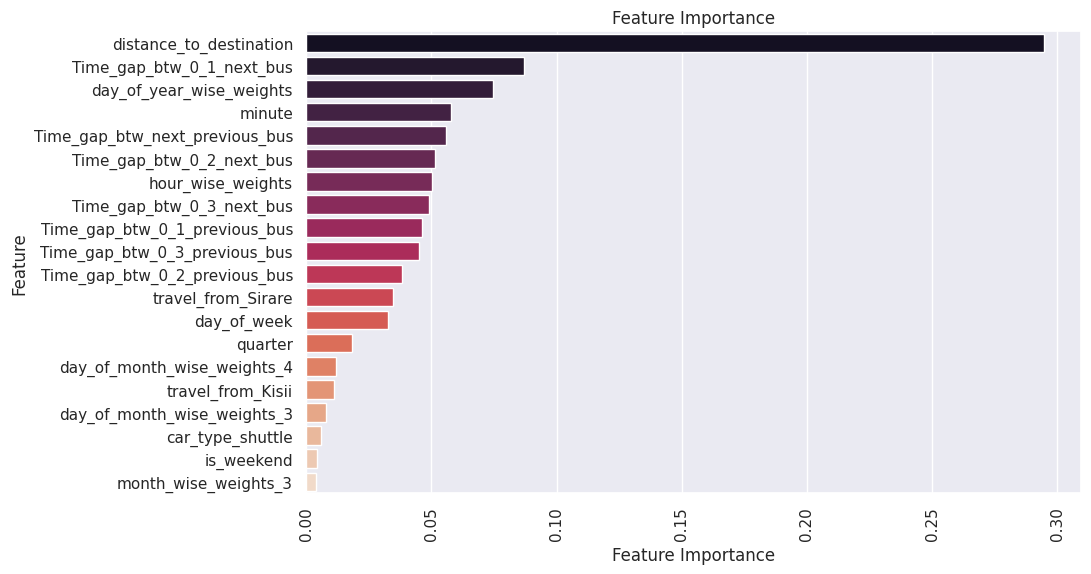

In [ ]:
#plotting the important fetures obtainind from the optimal RF model
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'Feature Importance', y = 'Feature', data=important_features, palette= 'rocket')
plt.xticks(rotation=90)
plt.title('Feature Importance');


# **Conclusion**

- In this project, we have used different regression models to predict transport demand from various places to nairobi.
- Using the data, we have created the target variable and several other features that contribute to our model performance.
- We have used regression models including:
  - Linear Models : Linear Regression, Lasso (L1), Ridge (L2)
  - Non Linear Models: Random Forest, XGBoost.

  We have also performed hyperparameter tuning to improve the performance of these models.
- Out of all these models, the hyperparameter tuned Random Forest gives the best result with an accuracy of around 95%.